In [1]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
import galsim
from pyHalo.preset_models import CDM
from copy import deepcopy
from lenstronomy.Util.correlation import power_spectrum_1d
from matplotlib.lines import Line2D
from lenstronomy.Plots import plot_util as len_plot_util

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):  # ../../
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import plot_util
from mejiro.utils import util

In [2]:
ps_dir = os.path.join(data_dir, 'output', 'power_spectra_parallelized')
r = np.load(os.path.join(ps_dir, 'r.npy'))

In [5]:
run = str(np.random.randint(0, 100)).zfill(3)
print(f'run: {run}')

# load
r = np.load(os.path.join(ps_dir, 'r.npy'))
kappa_r = np.load(os.path.join(ps_dir, 'kappa_r.npy'))
wdm_realization = util.unpickle(os.path.join(ps_dir, f'wdm_realization_*_run{run}.pkl'))
mdm_realization = util.unpickle(os.path.join(ps_dir, f'mdm_realization_*_run{run}.pkl'))
cdm_realization = util.unpickle(os.path.join(ps_dir, f'cdm_realization_*_run{run}.pkl'))
kappa_ps_wdm = np.load(glob(os.path.join(ps_dir, f'ps_kappa_wdm_*_run{run}.npy'))[0])
kappa_ps_mdm = np.load(glob(os.path.join(ps_dir, f'ps_kappa_mdm_*_run{run}.npy'))[0])
kappa_ps_cdm = np.load(glob(os.path.join(ps_dir, f'ps_kappa_cdm_*_run{run}.npy'))[0])
res_ps_wdm = np.load(glob(os.path.join(ps_dir, f'res_ps_wdm_*_run{run}.npy'))[0])
res_ps_mdm = np.load(glob(os.path.join(ps_dir, f'res_ps_mdm_*_run{run}.npy'))[0])
res_ps_pos_1 = np.load(glob(os.path.join(ps_dir, f'res_ps_pos_1_*_run{run}.npy'))[0])
res_ps_pos_2 = np.load(glob(os.path.join(ps_dir, f'res_ps_pos_2_*_run{run}.npy'))[0])
res_ps_pos_3 = np.load(glob(os.path.join(ps_dir, f'res_ps_pos_3_*_run{run}.npy'))[0])
res_ps_pos_4 = np.load(glob(os.path.join(ps_dir, f'res_ps_pos_4_*_run{run}.npy'))[0])
res_ps_pos_5 = np.load(glob(os.path.join(ps_dir, f'res_ps_pos_5_*_run{run}.npy'))[0])
res_ps_pos_6 = np.load(glob(os.path.join(ps_dir, f'res_ps_pos_6_*_run{run}.npy'))[0])
res_ps_pos_7 = np.load(glob(os.path.join(ps_dir, f'res_ps_pos_7_*_run{run}.npy'))[0])
res_ps_pos_8 = np.load(glob(os.path.join(ps_dir, f'res_ps_pos_8_*_run{run}.npy'))[0])
res_ps_pos_9 = np.load(glob(os.path.join(ps_dir, f'res_ps_pos_9_*_run{run}.npy'))[0])
res_ps_pos_10 = np.load(glob(os.path.join(ps_dir, f'res_ps_pos_10_*_run{run}.npy'))[0])
res_ps_pos_11 = np.load(glob(os.path.join(ps_dir, f'res_ps_pos_11_*_run{run}.npy'))[0])
res_ps_pos_12 = np.load(glob(os.path.join(ps_dir, f'res_ps_pos_12_*_run{run}.npy'))[0])
res_ps_pos_13 = np.load(glob(os.path.join(ps_dir, f'res_ps_pos_13_*_run{run}.npy'))[0])
res_ps_pos_14 = np.load(glob(os.path.join(ps_dir, f'res_ps_pos_14_*_run{run}.npy'))[0])
res_ps_pos_15 = np.load(glob(os.path.join(ps_dir, f'res_ps_pos_15_*_run{run}.npy'))[0])
res_ps_pos_16 = np.load(glob(os.path.join(ps_dir, f'res_ps_pos_16_*_run{run}.npy'))[0])
res_ps_pos_17 = np.load(glob(os.path.join(ps_dir, f'res_ps_pos_17_*_run{run}.npy'))[0])
res_ps_pos_18 = np.load(glob(os.path.join(ps_dir, f'res_ps_pos_18_*_run{run}.npy'))[0])

run: 058


Plot

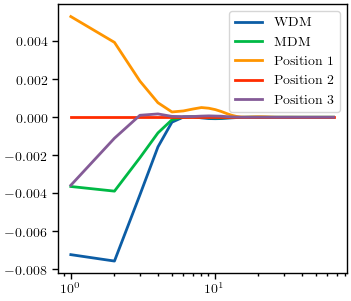

In [8]:
_, ax = plt.subplots(figsize=(3.5, 3), constrained_layout=True)

ax.plot(r, res_ps_wdm, color='C0', label='WDM')
ax.plot(r, res_ps_mdm, color='C1', label='MDM')
ax.plot(r, res_ps_pos_1, color='C2', label='Position 1')
ax.plot(r, res_ps_pos_2, color='C3', label='Position 2')
ax.plot(r, res_ps_pos_3, color='C4', label='Position 3')

ax.set_xscale('log')

plt.legend()
plt.savefig(os.path.join(figure_dir, 'power_spectra_single.png'), dpi=1200)
plt.show()